<a href="https://colab.research.google.com/github/salzzyy/COMPUTER-VISION/blob/main/HOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histogram of Oriented Gradients (HOG)
What is HOG?
HOG ** (Histogram of Oriented Gradients) ** is a feature descriptor used for object detection, especially human detection. It captures the structure and shape of objects by analyzing gradient orientations in localized image regions.


## Key Steps in HOG Computation:
* 1️⃣ Gradient Calculation → Computes the gradient (direction & magnitude) for each pixel.
* 2️⃣ Orientation Binning → Groups gradients into bins based on their direction (0°-180° or 0°-360°).
* 3️⃣ Normalization → Reduces the impact of lighting variations by normalizing feature vectors.
* 4️⃣ Feature Vector Creation → The final HOG descriptor is a concatenation of all local histograms


## 🔹 Why HOG?
* Robust to illumination changes (normalization reduces lighting effects).
* Invariant to minor deformations (focuses on shape rather than texture).
* Effective for detecting objects like humans, faces, and vehicles.


## 🔹 Steps in HOG Computation:

### 1️⃣ Preprocessing:
- Convert the image to **grayscale** to reduce computation.

### 2️⃣ Gradient Computation:
- Compute the **gradient magnitude & direction** for each pixel using Sobel filters.
For each pixel \((x, y)\), the gradients in the **X and Y directions** are calculated using the Sobel operator:

$G_x = I(x+1, y) - I(x-1, y)$

$
G_y = I(x, y+1) - I(x, y-1)
$

### **2️⃣ Gradient Magnitude**
The magnitude of the gradient is computed as:    
$ Magnitude = \sqrt{G_x^2 + G_y^2} $
### **3️⃣ Gradient Direction (Orientation)**
The direction (angle) of the gradient is given by:

$theta = \tan^{-1} \left( \frac{G_y}{G_x} \right)$

where $theta$  is in **degrees** (0° to 180° or 0° to 360°).

These computed gradients are then used for **orientation binning, normalization, and feature extraction** in the HOG descriptor. 🚀

### 3️⃣ Orientation Binning:
- Divide the image into **small cells** (e.g., **8×8 pixels**).  
- Each cell accumulates **histograms of gradients** based on direction (**0°-180°** or **0°-360°**).

### 4️⃣ Block Normalization:
- Group multiple **cells into blocks** (e.g., **16×16**).  
- Normalize the feature vector to make it **illumination-invariant**.

### 5️⃣ Feature Vector Construction:
- Concatenate all **block histograms** into a **final HOG descriptor**.

---

## 🔹 Applications of HOG:
✔ **Human detection** (Used in **Daimler pedestrian detection** and **OpenCV**).  
✔ **Face detection** (Used in **dlib**).  
✔ **Vehicle detection** (**Traffic monitoring**).  
✔ **Object classification** (Used with **SVM**, **CNNs**).  


## ✅ Advantages of HOG:
* ✔ Works well in object detection (e.g., face, pedestrian detection).
* ✔ Invariant to illumination & minor deformations.
* ✔ Efficient when used with SVM (Support Vector Machine) for classification.

In [2]:
# Step 1: Install dlib & necessary libraries
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np

## NOTE-> USE numpy==1.23.5 VERSION

In [3]:
#Step 2: Load dlib's pre-trained HOG-based face detector
face_detector_hog = dlib.get_frontal_face_detector()


In [24]:
# Step 3: Read the image
image = cv2.imread('/content/gropu.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for plotting
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to RGB for plotting

image_rgb = image_rgb.astype(np.uint8)

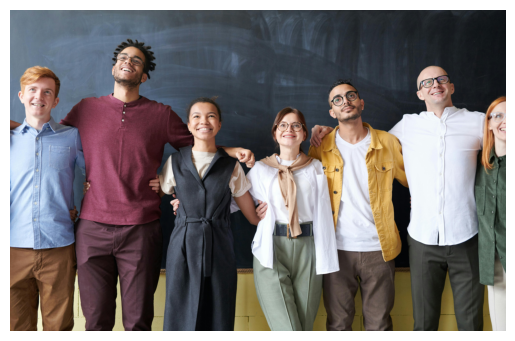

In [5]:
# Ensure image is not None (check if file loaded correctly)
if image is None:
    raise ValueError("Error loading image. Please check the file.")
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [20]:
faces = face_detector_hog(image_rgb)

In [21]:
if image_rgb.dtype != np.uint8:
    image_rgb = np.array(image_rgb, dtype=np.uint8)
    print("Image data type:", image_rgb.dtype)
else:
  print("Image data already in unit8")

Image data already in unit8


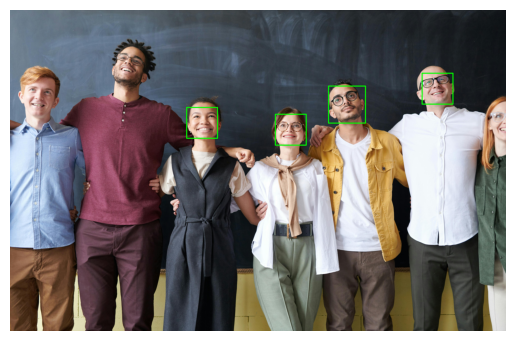

Faces detected: 4


In [25]:
#Step 4: Draw bounding boxes around detected faces
for face in faces:
    x, y, w, h = face.left(), face.top(), face.width(), face.height()
    cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (0, 255, 0), 12)  # Green box

# Step 5: Display the image with detected faces
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

#Step 6: Print the number of faces detected
print(f"Faces detected: {len(faces)}")

HOG remains a classic and reliable feature extraction method, often combined with modern deep learning techniques for enhanced performance.